<a href="https://colab.research.google.com/github/emeraldap10/colab/blob/main/UTS1_G_211_21_0021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

from google.colab import files
uploaded = files.upload()


Saving CADdataset.csv to CADdataset (4).csv


In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
# The code df.isnull().sum() is used to count the number of missing values or null values in each column of a Pandas DataFrame df.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [50]:
# To get the entire information about the null values and the data types of the features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


<ipython-input-61-6bbbe0c5aba4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdBu')


<Axes: >

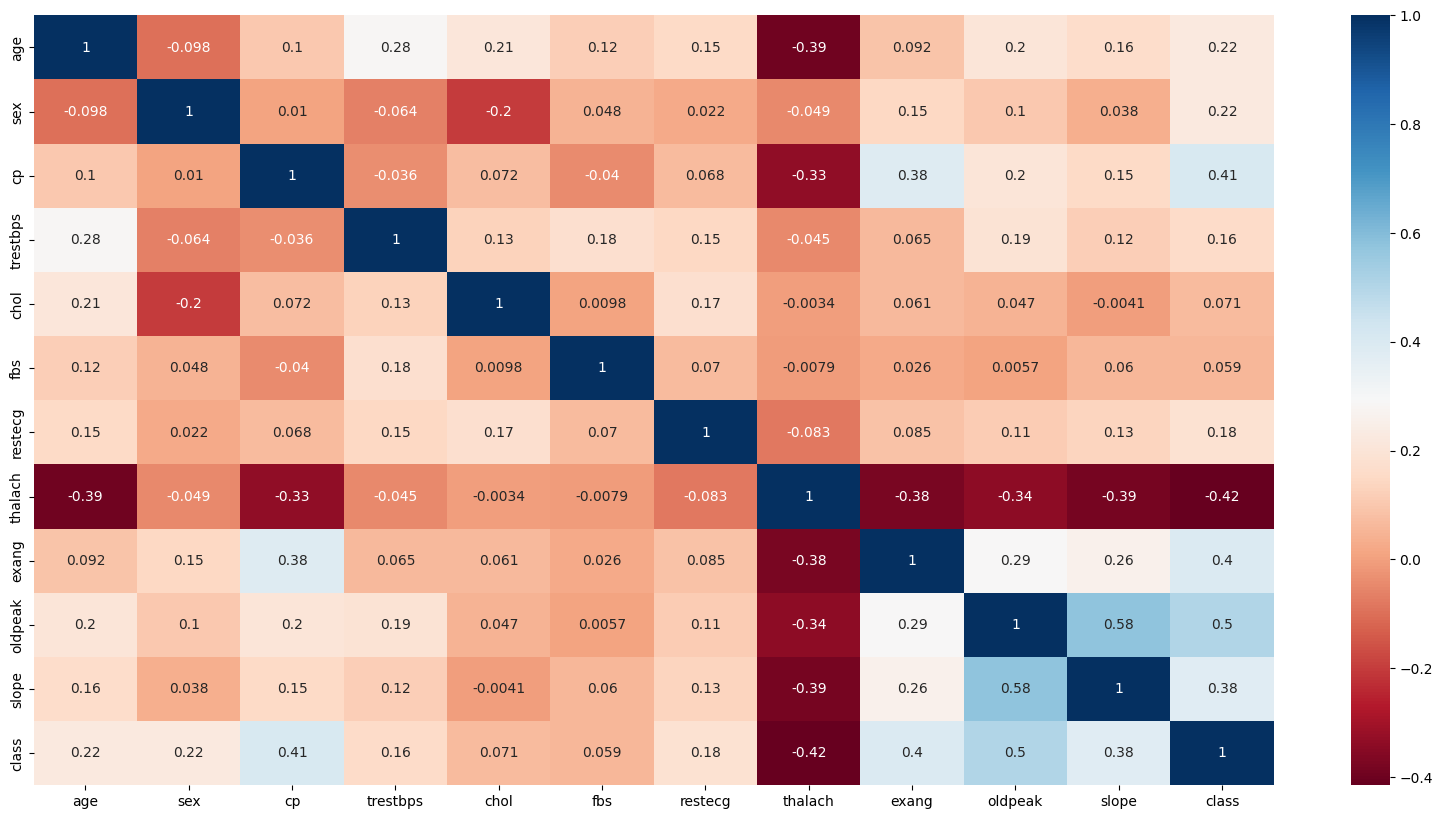

In [61]:
#  creating heatmap using seaborn library
#  df.corr() calculates correlation between all column in the dataframe
# The annot=True argument displays the correlation coefficients in each cell of the heatmap.

plt.figure(figsize=(20,10)) # 20 inch width and 10 inch height
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

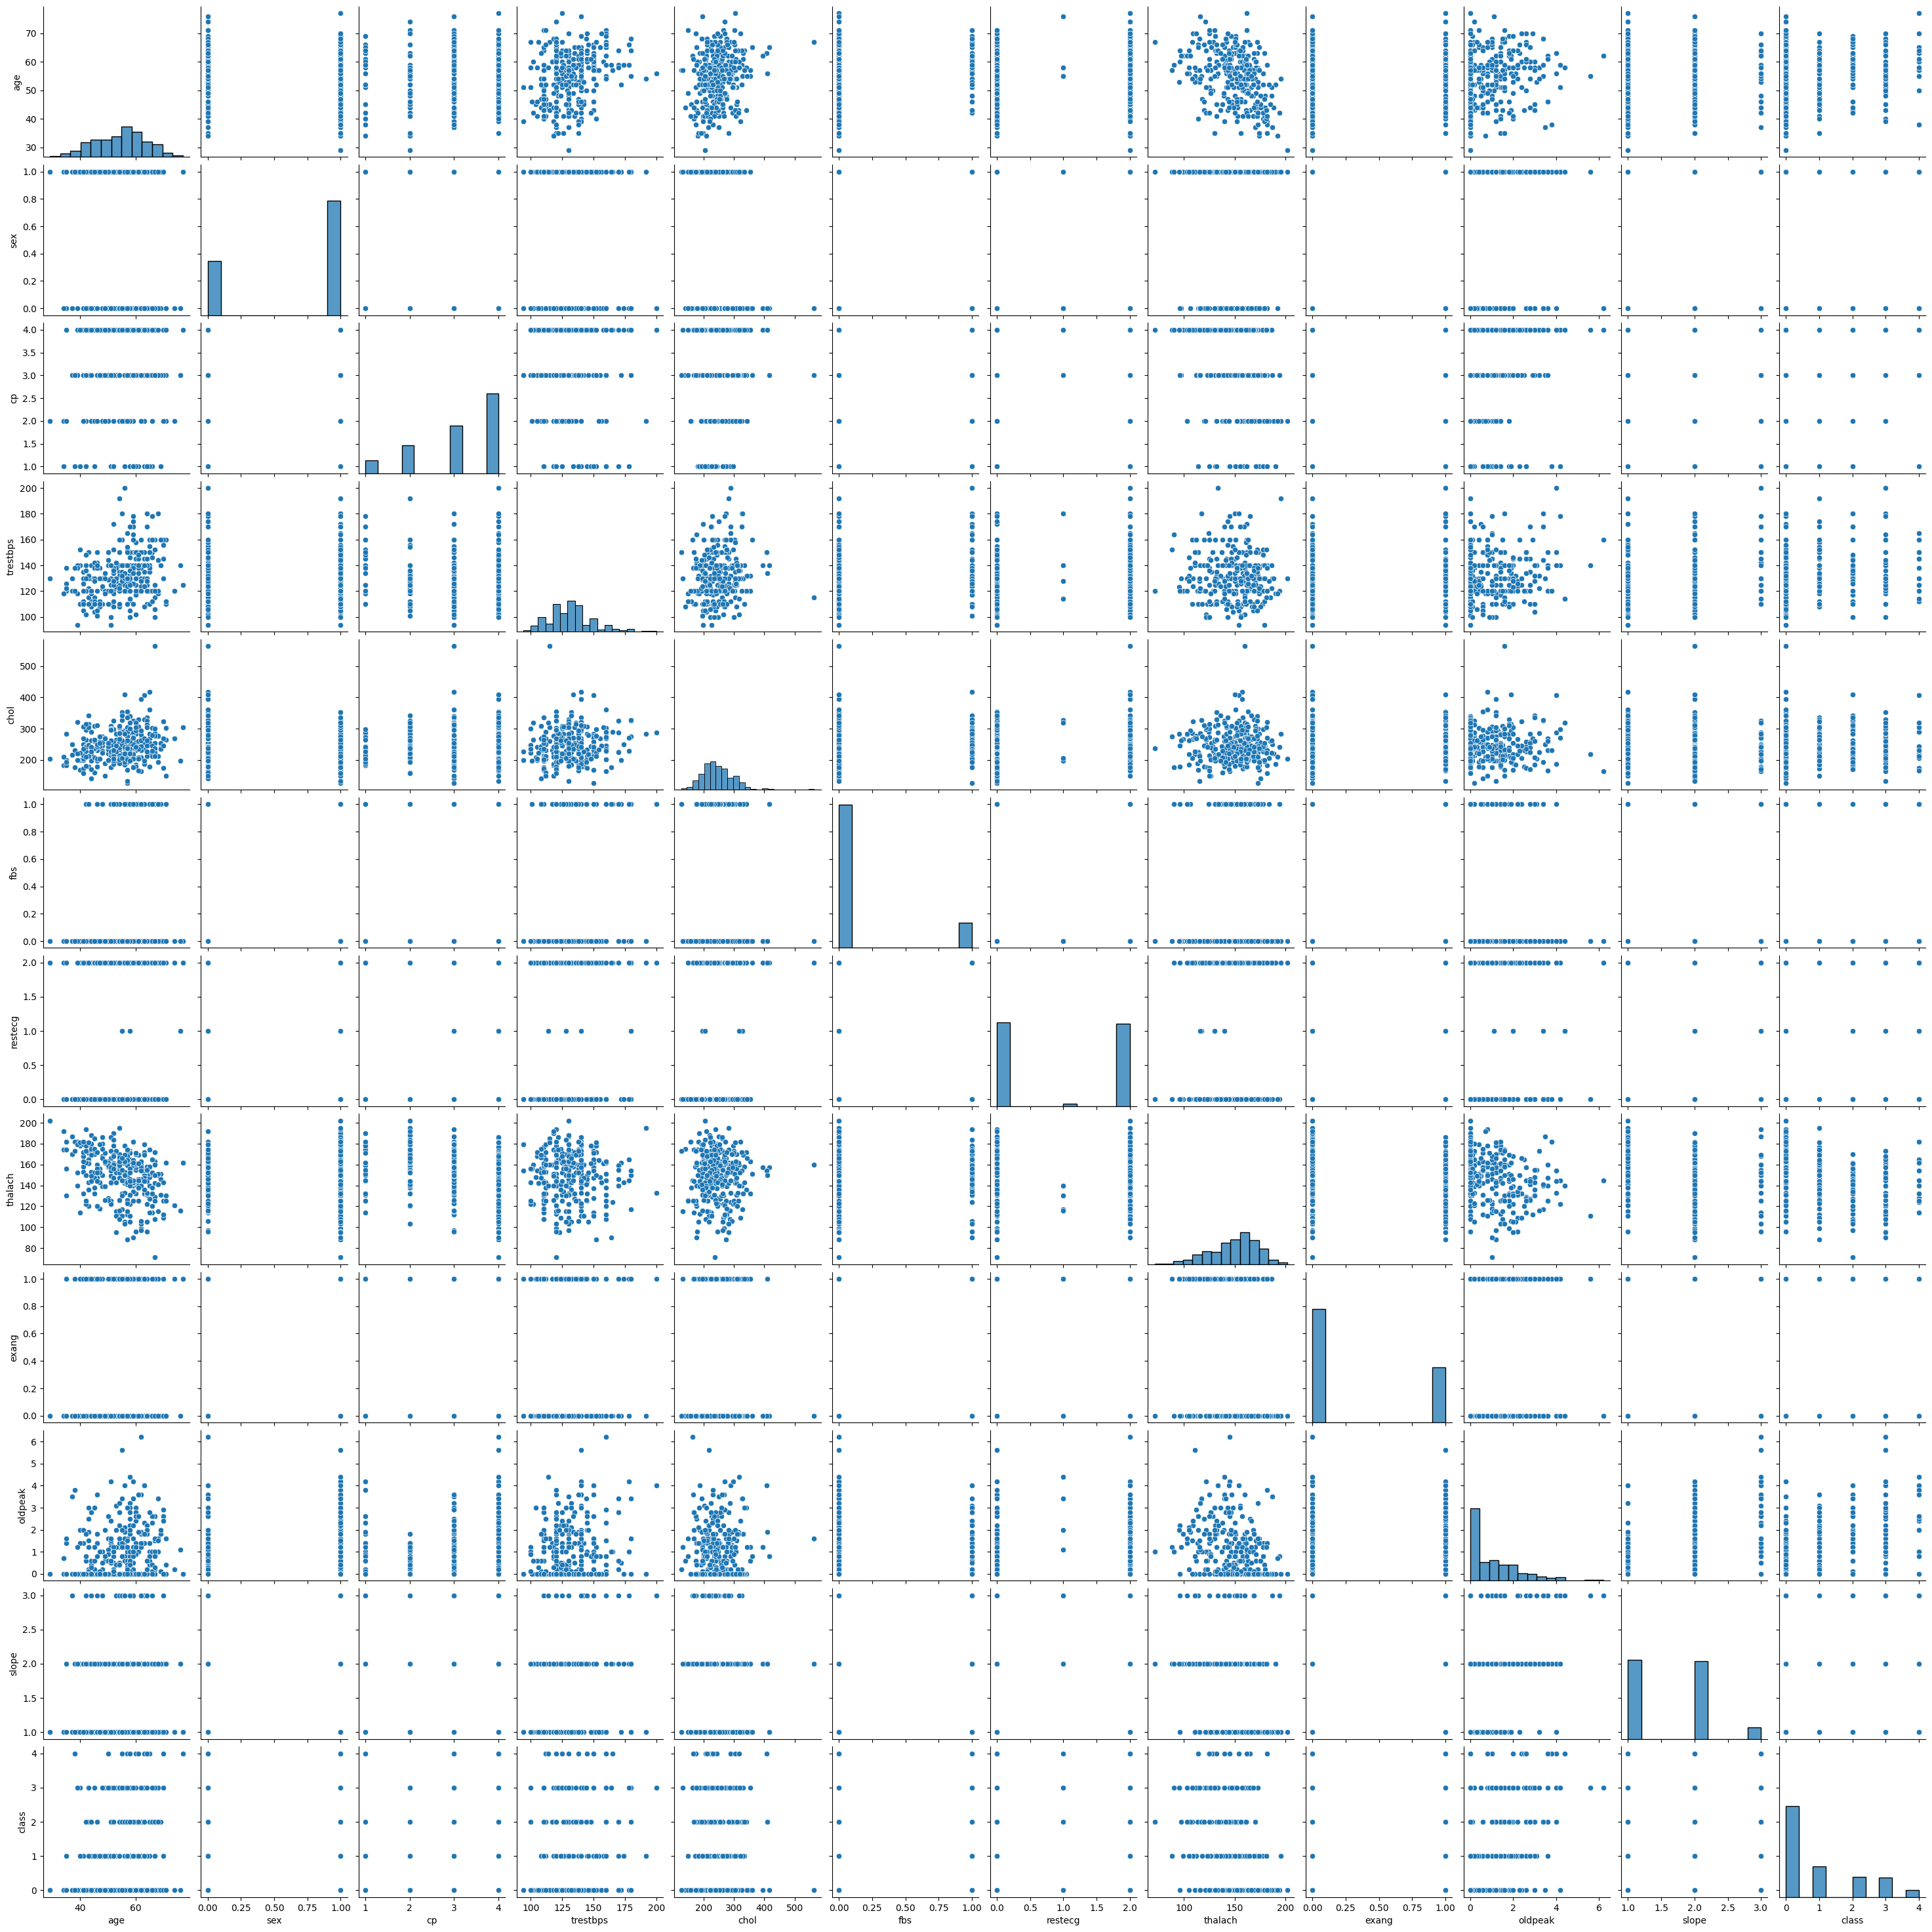

In [62]:
sns.pairplot(data=df)

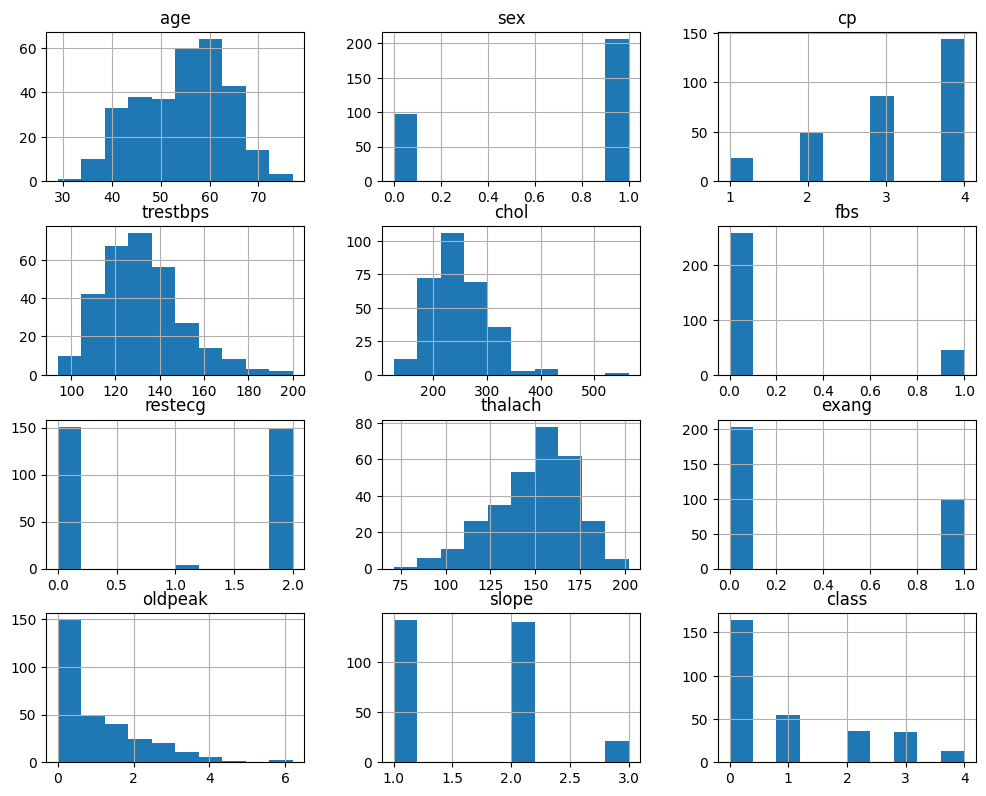

In [63]:
# histogram of the feature
# shows the frequency of the feature
df.hist(figsize=(12,12),layout=(5,3));
plt.show()

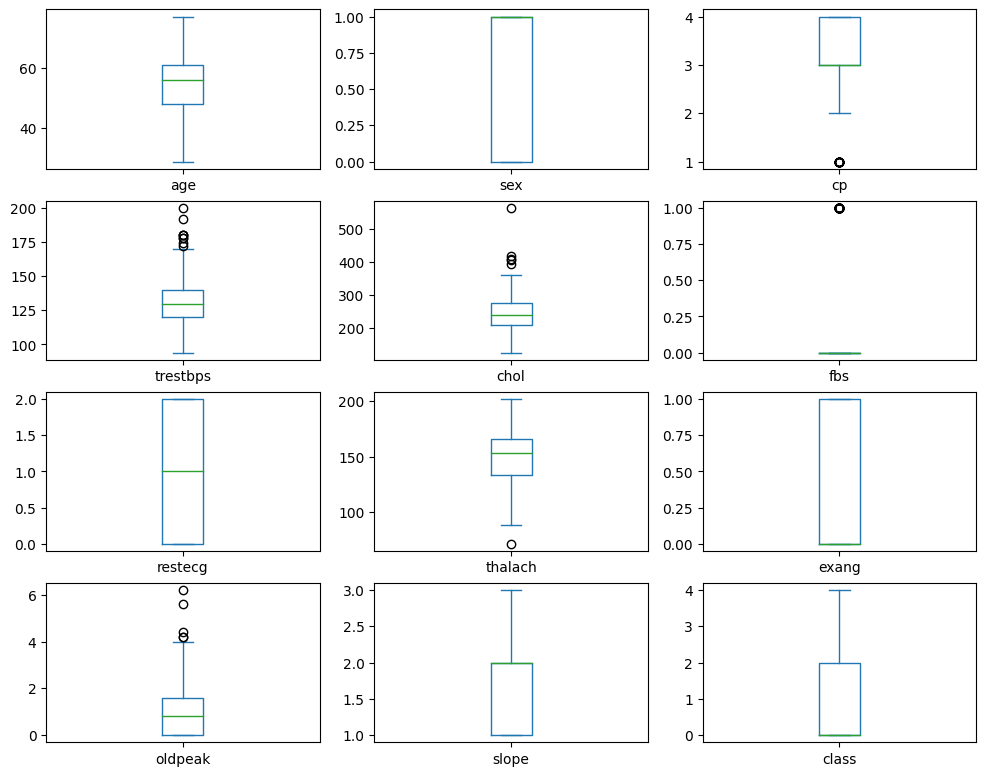

In [64]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

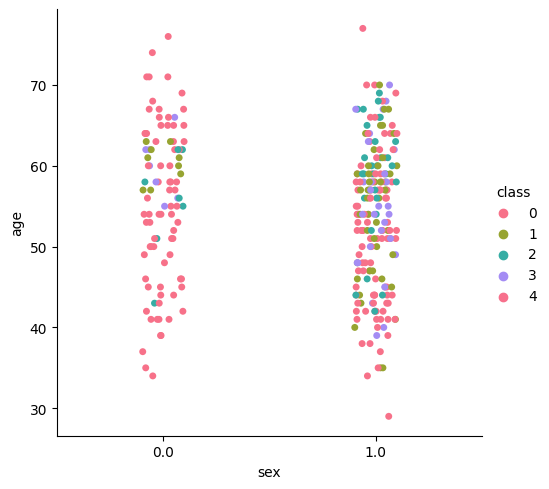

In [66]:
sns.catplot(data=df,x='sex',y='age',hue='class',palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

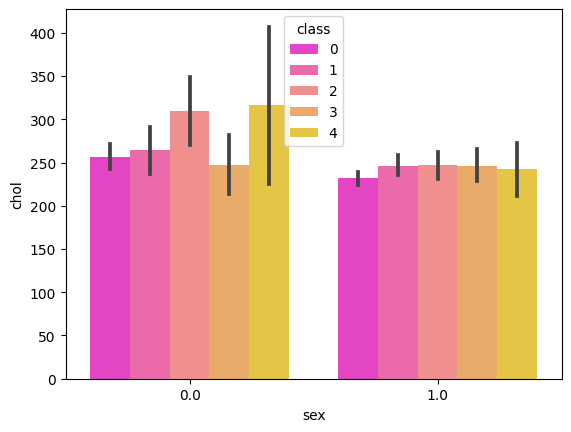

In [68]:
# sex Vs cholestrol level
sns.barplot(data=df,x='sex',y='chol',hue='class',palette='spring')

In [69]:
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [70]:
# cp= chest pain
df['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

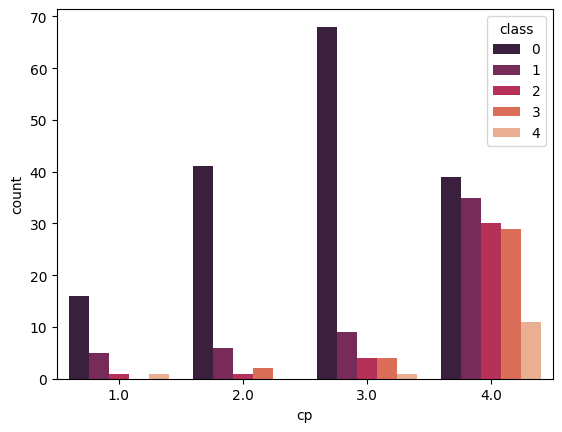

In [72]:
sns.countplot(x='cp',hue='class',data=df,palette='rocket')

In [73]:
gen=pd.crosstab(df['sex'],df['class'])
print(gen)

class   0   1   2   3   4
sex                      
0.0    72   9   7   7   2
1.0    92  46  29  28  11


<Axes: xlabel='sex'>

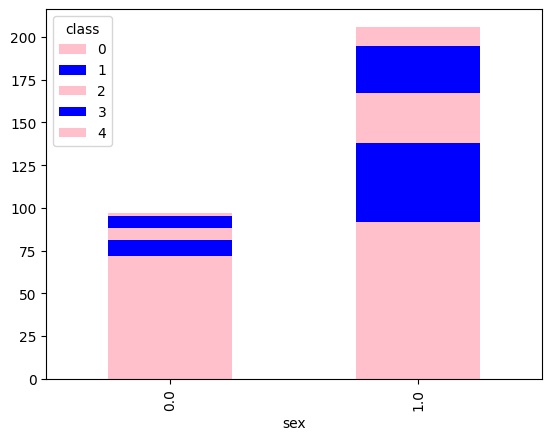

In [74]:
gen.plot(kind='bar',stacked=True,color=['pink','blue'],grid=False)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
ss=StandardScaler()
column_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[column_to_scale]=ss.fit_transform(df[column_to_scale])

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0,0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0,2
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0,1
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0,0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0,0
